In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
np.random.seed(1337)  # for reproducibility

In [2]:
def load_and_featurize_data():
    # the data, shuffled and split between train and test sets
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # reshape input into format Conv2D layer likes
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    # don't change conversion or normalization
    X_train = X_train.astype('float32')  # data was uint8 [0-255]
    X_test = X_test.astype('float32')    # data was uint8 [0-255]
    X_train /= 255  # normalizing (scaling from 0 to 1)
    X_test /= 255   # normalizing (scaling from 0 to 1)

    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices (don't change)
    Y_train = to_categorical(y_train, nb_classes)  # cool
    Y_test = to_categorical(y_test, nb_classes)
    # in Ipython you should compare Y_test to y_test
    return X_train, X_test, Y_train, Y_test


def define_model(nb_filters, kernel_size, input_shape, pool_size,act,drop,opt):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation(act))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation(act))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(drop))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation(act))

    model.add(Dropout(drop))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model flattened out to  (None, 1936)
Epoch 1/20
235/235 [==============================] - 20s 85ms/step - loss: 0.4687 - accuracy: 0.8582 - val_loss: 0.1033 - val_accuracy: 0.9685
Epoch 2/20
235/235 [==============================] - 20s 83ms/step - loss: 0.1241 - accuracy: 0.9633 - val_loss: 0.0556 - val_accuracy: 0.9827
Epoch 3/20
235/235 [==============================] - 20s 83ms/step - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 4/20
235/235 [==============================] - 20s 83ms/step - loss: 0.0686 - accuracy: 0.9795 - val_loss: 0.0381 - val_accuracy: 0.9871
Epoch 5/20
235/235 [==============================] - 20s 84ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0358 - val_accuracy: 0.9880
Epoch 6/20
235/235 [==============================] - 20s 84ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0378 - val_accuracy: 0.9881
Epoch 7/20
235/235 [======

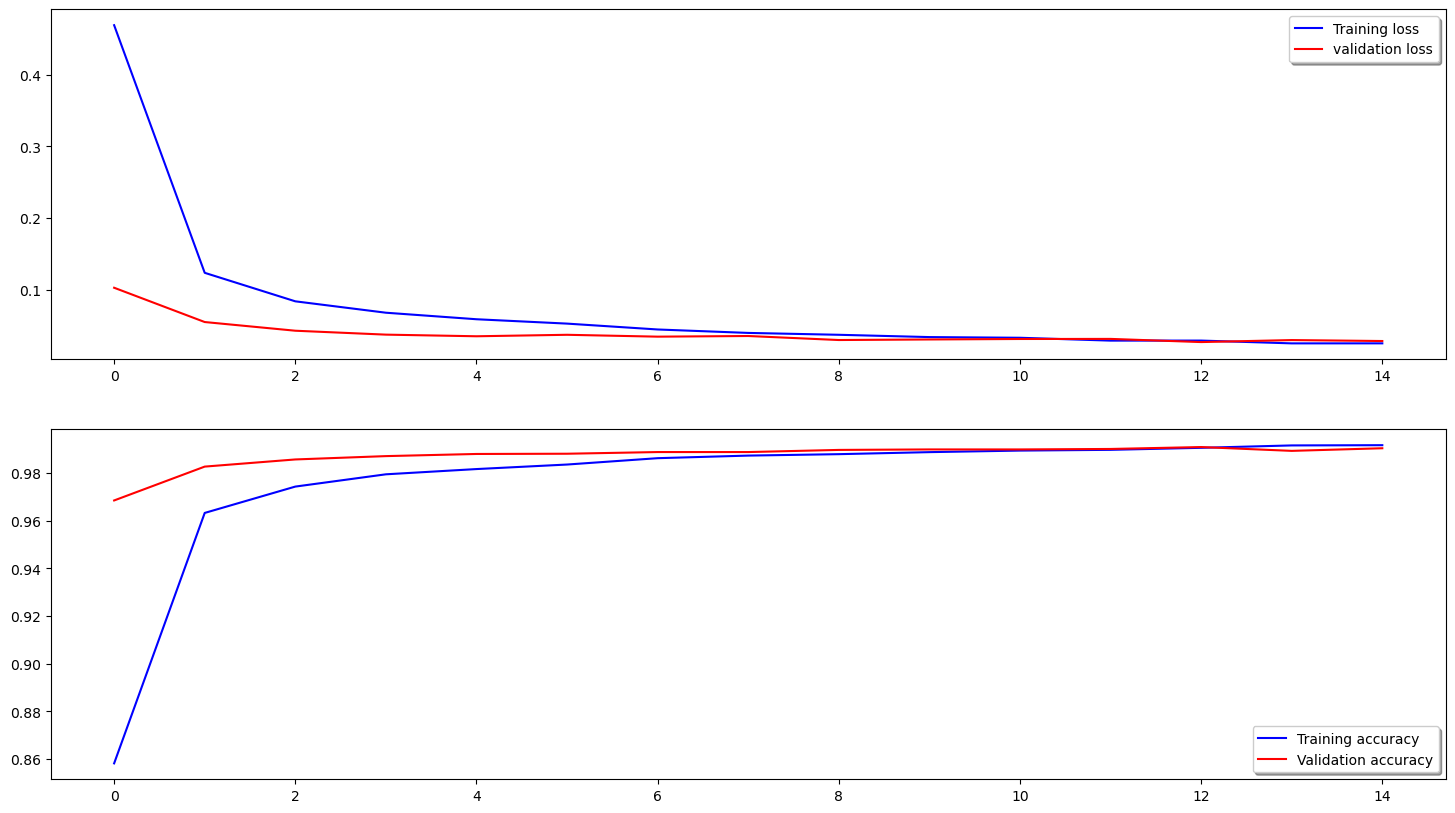

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
if __name__ == '__main__':
    # important inputs to the model: don't changes the ones marked KEEP
    batch_size = 256  # number of training samples used at a time to update the weights
    nb_classes = 10    # number of output possibilities: [0 - 9] KEEP
    nb_epoch = 20       # number of passes through the entire train dataset before weights "final"
    img_rows, img_cols = 28, 28   # the size of the MNIST images KEEP
    input_shape = (img_rows, img_cols, 1)   # 1 channel image input (grayscale) KEEP
    nb_filters = 16    # number of convolutional filters to use
    pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
    kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
    act = 'relu'
    drop = 0.1
    opt = 'adam'
    
    CB = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=2, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

    X_train, X_test, Y_train, Y_test = load_and_featurize_data()

    model = define_model(nb_filters, kernel_size, input_shape, pool_size,act,drop,opt)

    # during fit process watch train and test error simultaneously
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test), callbacks = CB)

    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])  # this is the one we care about
    
    fig, ax = plt.subplots(2,1, figsize=(18, 10))
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

# Confusion Matrix

313/313 [==============================] - 1s 2ms/step


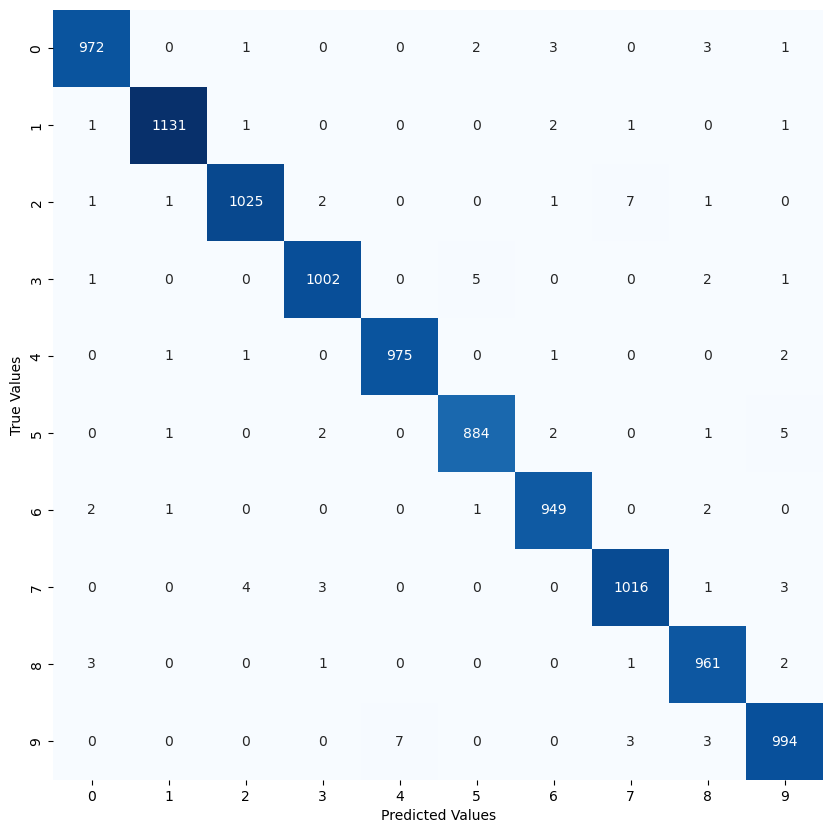

In [9]:
fig = plt.figure(figsize=(10, 10))

y_pred = model.predict(X_test) 

Y_pred = np.argmax(y_pred, 1) 
Y_test = np.argmax(Y_test, 1)

mat = confusion_matrix(Y_test, Y_pred) 

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();